# Introducción a regresión lineal 
En esta notebook aprenderás qué es una regresión lineal y cómo funciona con un ejemplo con Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qué contienen.

## Importando datos

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\delgaf18\AppData\Local\Temp\ipykernel_18760\911649535.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Entendiendo los datos
Una vez descargados los datos hay que entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que recomiendo que empecemos viendo un gráfico de correlaciones usando **[pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)** de ***Seaborn***.

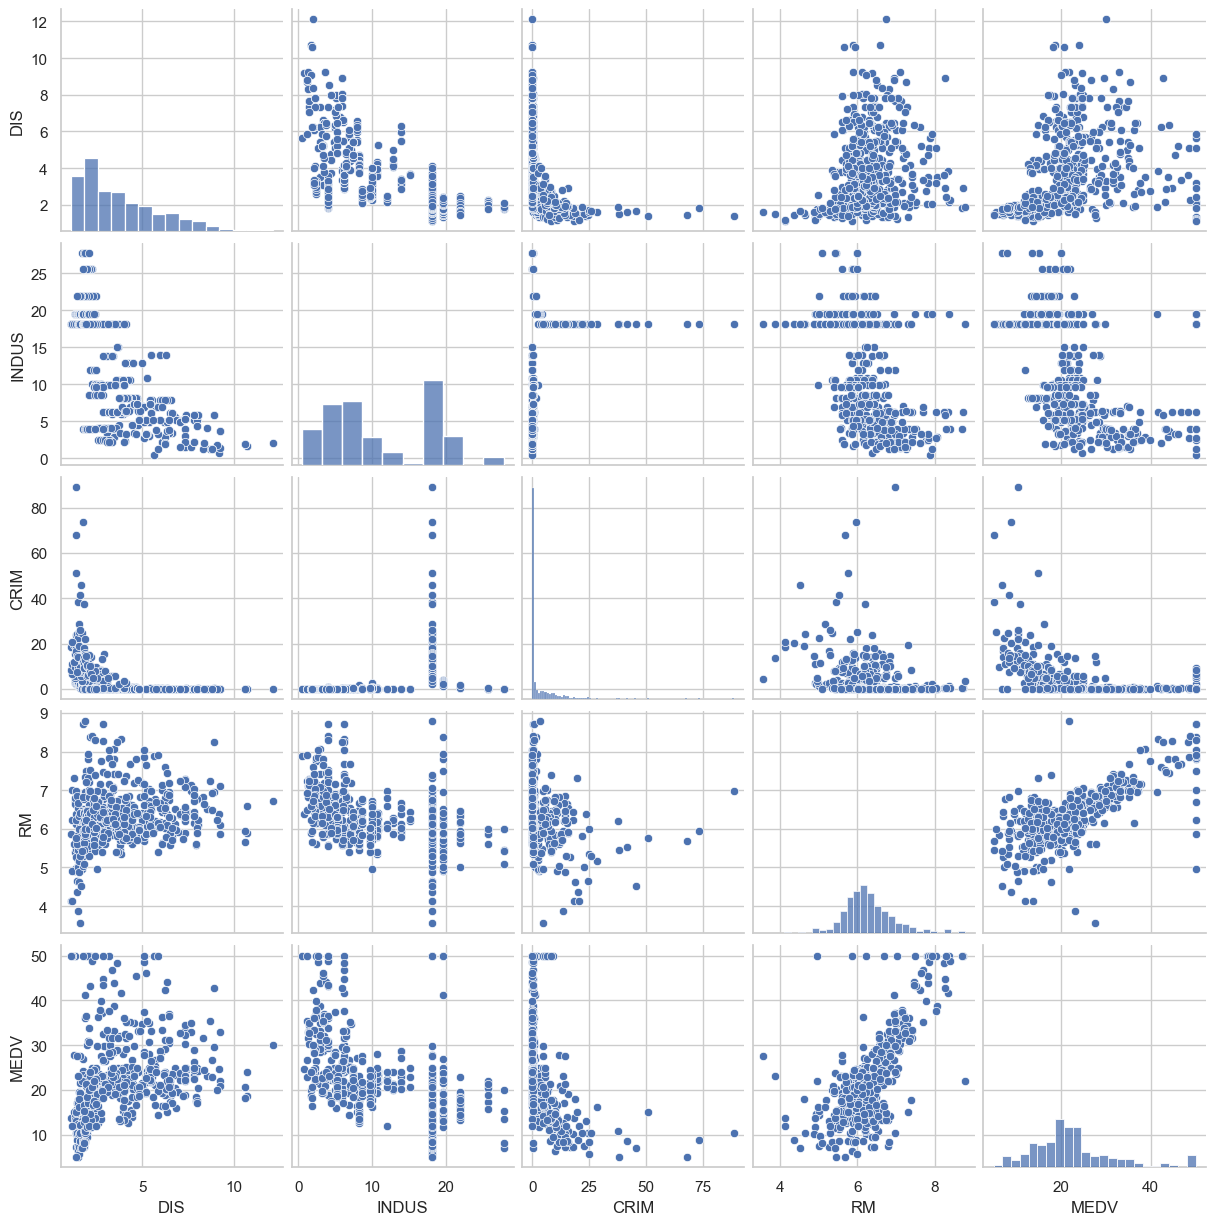

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')
cols = ['DIS','INDUS','CRIM', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.show()

Una vez que vemos cómo están correlacionadas las variables de manera visual, es importante usar un método numérico para poder entender las correlaciones. 

<Axes: >

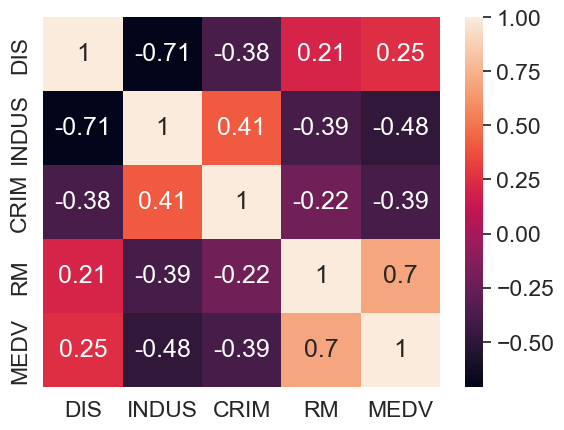

In [3]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True,yticklabels=cols,xticklabels=cols)

## Creando el modelo con scikit-learn

In [4]:
from sklearn.preprocessing import StandardScaler #permite hacer un escalamiento, esto aumenta el performance pues reduce el rango donde se desempeña el modelo
from sklearn.linear_model import LinearRegression

X = df['RM'].values.reshape(-1, 1) #values solo da los valores y el reshape sirve para es para cambiar filas por columnas
y = df['MEDV'].values.reshape(-1, 1) 

sc_x = StandardScaler()  # se asigna una variable a esta funcion
sc_y = StandardScaler() # se asigna una variable a esta funcion

X_std = sc_x.fit_transform(X) # se escalan los datos
y_std = sc_y.fit_transform(y) #se escalan los datos

slr = LinearRegression() # se asigna una funcion a la regresion lineal
slr.fit(X_std, y_std) # se crea el modelo

LinearRegression()

In [5]:
print(X_std)

[[ 4.13671889e-01]
 [ 1.94274453e-01]
 [ 1.28271368e+00]
 [ 1.01630251e+00]
 [ 1.22857665e+00]
 [ 2.07096381e-01]
 [-3.88410945e-01]
 [-1.60465557e-01]
 [-9.31205901e-01]
 [-3.99808215e-01]
 [ 1.31589471e-01]
 [-3.92684921e-01]
 [-5.63643963e-01]
 [-4.78164442e-01]
 [-2.68739617e-01]
 [-6.42000190e-01]
 [-4.98109663e-01]
 [-4.19753436e-01]
 [-1.18052117e+00]
 [-7.94438668e-01]
 [-1.01811008e+00]
 [-4.55369903e-01]
 [-2.03205317e-01]
 [-6.71918022e-01]
 [-5.13780909e-01]
 [-9.76794979e-01]
 [-6.71918022e-01]
 [-3.38547892e-01]
 [ 2.99699195e-01]
 [ 5.54713098e-01]
 [-8.14383890e-01]
 [-3.02931425e-01]
 [-4.76739783e-01]
 [-8.31479794e-01]
 [-2.68739617e-01]
 [-5.00958981e-01]
 [-6.32027579e-01]
 [-6.19205651e-01]
 [-4.53945244e-01]
 [ 4.42165063e-01]
 [ 1.05334363e+00]
 [ 6.91480331e-01]
 [-1.64739533e-01]
 [-1.04903869e-01]
 [-3.07205401e-01]
 [-8.58548308e-01]
 [-7.10383806e-01]
 [-3.62767089e-01]
 [-1.26172671e+00]
 [-9.72521003e-01]
 [-4.58219220e-01]
 [-2.41671102e-01]
 [ 3.2249373

## Análisis de resultados

Text(0.5, 0, 'Promedio de habitaciones [RM]')

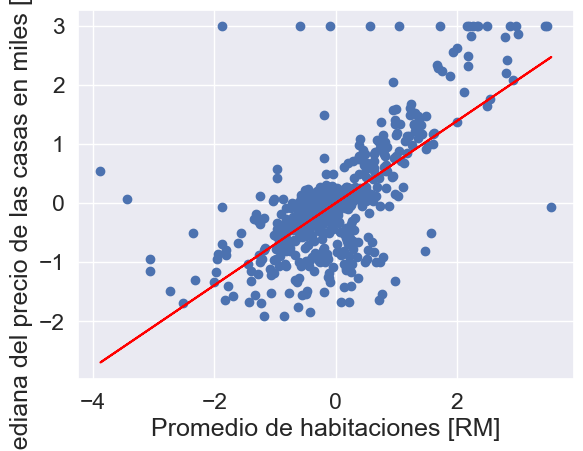

In [6]:
plt.scatter(X_std,y_std)
plt.plot(X_std,slr.predict(X_std), color='red')
plt.ylabel("Mediana del precio de las casas en miles [MEDV]")
plt.xlabel("Promedio de habitaciones [RM]")

In [7]:
predicciones=slr.predict(X_std)
predicciones=sc_y.inverse_transform(predicciones)
X_std = sc_x.inverse_transform(X_std) # se escalan los datos
y_std = sc_y.inverse_transform(y_std)


Text(0.5, 0, 'Promedio de habitaciones [RM]')

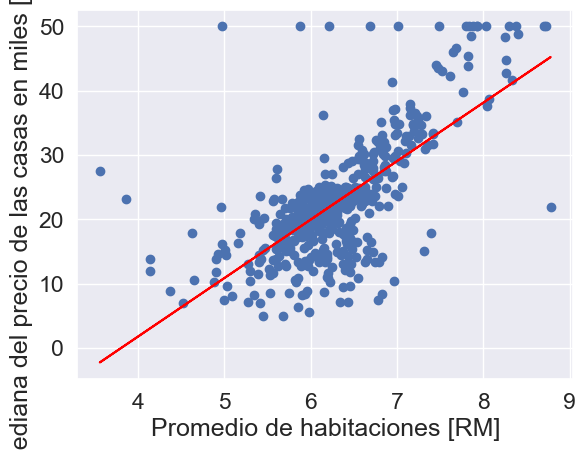

In [8]:
plt.scatter(X_std,y_std)
plt.plot(X_std,predicciones, color='red')
plt.ylabel("Mediana del precio de las casas en miles [MEDV]")
plt.xlabel("Promedio de habitaciones [RM]")

## Generando predicción con el modelo

In [9]:
num_habitaciones = 11
num_habitaciones_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1))
print("El precio de una casa con 11 habitaciones en Boston es de ", sc_y.inverse_transform(slr.predict(num_habitaciones_std)))

El precio de una casa con 11 habitaciones en Boston es de  [[65.45257802]]


# Regresión lineal multivariable



In [10]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
            header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\delgaf18\AppData\Local\Temp\ipykernel_18760\1444682622.py:3: SyntaxWarning: invalid escape sequence '\s'
  header=None, sep='\s+')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Creando modelo con sklearn

In [11]:
X_std = sc_y.fit_transform(X)
X_std

array([[ 4.13671889e-01],
       [ 1.94274453e-01],
       [ 1.28271368e+00],
       [ 1.01630251e+00],
       [ 1.22857665e+00],
       [ 2.07096381e-01],
       [-3.88410945e-01],
       [-1.60465557e-01],
       [-9.31205901e-01],
       [-3.99808215e-01],
       [ 1.31589471e-01],
       [-3.92684921e-01],
       [-5.63643963e-01],
       [-4.78164442e-01],
       [-2.68739617e-01],
       [-6.42000190e-01],
       [-4.98109663e-01],
       [-4.19753436e-01],
       [-1.18052117e+00],
       [-7.94438668e-01],
       [-1.01811008e+00],
       [-4.55369903e-01],
       [-2.03205317e-01],
       [-6.71918022e-01],
       [-5.13780909e-01],
       [-9.76794979e-01],
       [-6.71918022e-01],
       [-3.38547892e-01],
       [ 2.99699195e-01],
       [ 5.54713098e-01],
       [-8.14383890e-01],
       [-3.02931425e-01],
       [-4.76739783e-01],
       [-8.31479794e-01],
       [-2.68739617e-01],
       [-5.00958981e-01],
       [-6.32027579e-01],
       [-6.19205651e-01],
       [-4.5

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df[['RM', 'INDUS']].values # seleccion de variables
y = df['MEDV'].values.reshape(-1, 1)
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

## Análisis de resultados

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

# Assuming df is defined somewhere in your code
# x1_range and x2_range are defined as in your code

X1, X2 = np.meshgrid(x1_range, x2_range)

plano = pd.DataFrame({'RM': X1.ravel(), 'INDUS': X2.ravel()})
pred = slr.predict(plano).reshape(X1.shape)
pred = sc_y.inverse_transform(pred)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Use add_subplot with projection='3d'
ax.plot_surface(X1, X2, pred, alpha=0.4)

ax.scatter3D(df['RM'], df['INDUS'], df['MEDV'], color='red', marker='.')
ax.view_init(elev=10, azim=5)
plt.show()


NameError: name 'x1_range' is not defined

# proyecto

In [14]:
data=pd.read_csv('./Material/Datasets/insurance.csv')

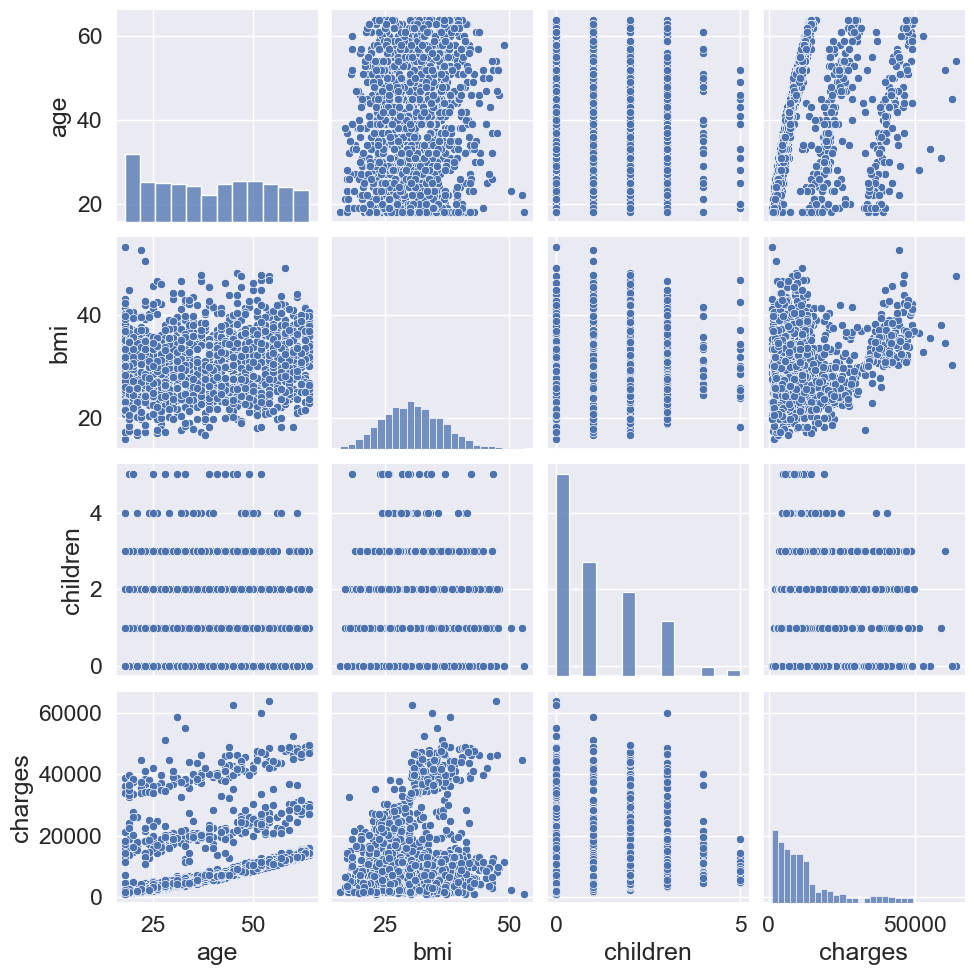

In [15]:
sns.pairplot(data=data)

<Axes: >

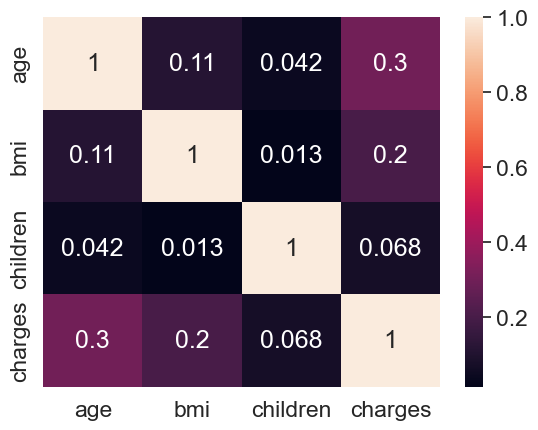

In [16]:
numeric_cols = ['age', 'bmi', 'children', 'charges']
cm = np.corrcoef(data[numeric_cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True, yticklabels=numeric_cols,xticklabels=numeric_cols)

In [17]:
data= pd.get_dummies(data, columns=['sex','smoker','region'], drop_first=True).astype(int)
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
X_cols = list(set(data.columns)-set(['charges']))
y_col = ['charges']

In [20]:
X = data[X_cols].values
y = data[y_col].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [22]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.7277
mse:  0.2555


In [23]:
#from regressors import stats
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [24]:
from scipy import stats

In [25]:
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========


AttributeError: module 'scipy.stats' has no attribute 'summary'

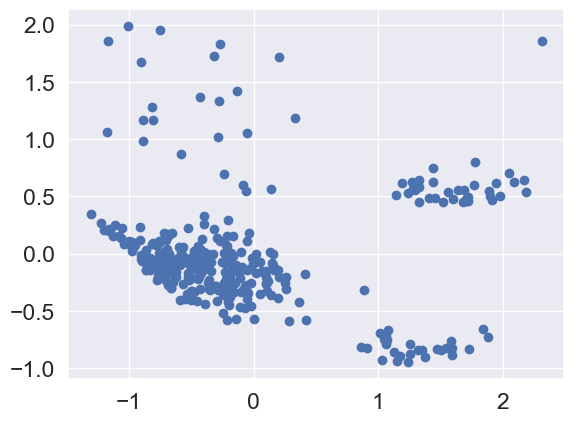

In [26]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()


## Segundo modelo
Estos resultados de arriba son buenos, pero se pueden mejorar. Intentaremos hacer algunas transformaciones sobre las variables que pueden ser de utilidad.

In [34]:
data=pd.read_csv('./Material/Datasets/insurance.csv')
data= pd.get_dummies(data, columns=['sex','smoker','region'], drop_first=True).astype(int)

In [36]:
data

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,1,0,1,0,0
1334,18,31,0,2205,0,0,0,0,0
1335,18,36,0,1629,0,0,0,1,0
1336,21,25,0,2007,0,0,0,0,1


In [38]:
df_second = data.copy()
df_second['age2'] = df_second['age']**2
df_second['sobrepeso'] = (df_second['bmi'] >= 30).astype(int)
df_second['sobrepeso*fumador'] = df_second.sobrepeso * df_second.smoker_yes

In [47]:
import statsmodels.api as sm

In [49]:
df_second.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest', 'age2',
       'sobrepeso', 'sobrepeso*fumador'],
      dtype='object')

In [50]:
X_cols = list(set(df_second.columns)-set(['charges']))

In [51]:
regressor_OLS = sm.OLS(endog=df_second['charges'], exog=df_second[X_cols]).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                  13.430
Model:                            OLS   Adj. R-squared (uncentered):             13.533
Method:                 Least Squares   F-statistic:                             -130.3
Date:                Tue, 21 Nov 2023   Prob (F-statistic):                        1.00
Time:                        15:32:17   Log-Likelihood:                         -13131.
No. Observations:                1338   AIC:                                  2.628e+04
Df Residuals:                    1327   BIC:                                  2.634e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
children            677.2144    104.502      6.480      0.000     472.208     882.221
smoker_yes         1.341e+04    438.311     30.598      0.000    1.26e+04    1.43e+04
age                 -26.4874     40.077     -0.661      0.509    -105.108      52.133
sobrepeso         -1032.6456    396.148     -2.607      0.009   -1809.790    -255.501
bmi                 123.0854     27.956      4.403      0.000      68.243     177.928
region_northwest   -269.9113    345.691     -0.781      0.435    -948.072     408.249
sex_male           -494.2972    243.401     -2.031      0.042    -971.789     -16.805
sobrepeso*fumador  1.981e+04    603.007     32.851      0.000    1.86e+04     2.1e+04
region_southeast   -832.0339    351.707     -2.366      0.018   -1521.997    -142.071
age2                  3.6570      0.517      7.075      0.000       2.643       4.671
region_southwest  -1221.8121    349.050     -3.500      0.000   -1906.563    -537.062
==============================================================================
Omnibus:                      890.841   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7724.223
Skew:                           3.169   Prob(JB):                         0.00
Kurtosis:                      12.918   Cond. No.                     1.21e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
X_cols = ['sobrepeso*fumador', 'smoker_yes', 'age2', 'children']
y_col = ['charges']

X = df_second[X_cols].values
y = df_second[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression(fit_intercept=False)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [40]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.91
mse:  0.0865


In [41]:
model.coef_ = model.coef_.reshape(-1)

In [42]:
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========


AttributeError: module 'scipy.stats' has no attribute 'summary'

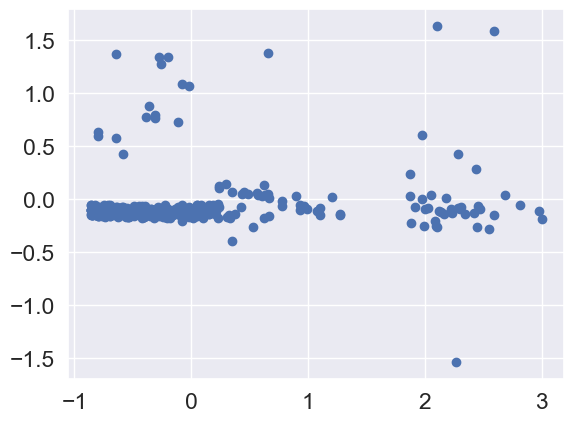

In [43]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()
